<a href="https://colab.research.google.com/github/DawiSyauqi/DIF62128_A_25_2311532009_Muhammad-Dawi-Syauqi/blob/main/Praktikum2/LogisticRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd

#load dataset
dataset_url="https://raw.githubusercontent.com/DawiSyauqi/DIF62128_A_25_2311532009_Muhammad-Dawi-Syauqi/refs/heads/main/datasets/diabetes.csv"
df=pd.read_csv(dataset_url)
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
#split dataset in features and target variable
feature_cols=['Pregnancies','Insulin','BMI','Age', 'DiabetesPedigreeFunction', 'Glucose', 'BloodPressure', 'SkinThickness']
x=df[feature_cols]#features
y=df.Outcome#target varaible

In [4]:
print(x.shape)
print(y.shape)

(768, 8)
(768,)


In [9]:
from sklearn.model_selection import train_test_split
x.train,x.test,y.train,y.test=train_test_split(x,y,test_size=0.3,random_state=0)

In [18]:
#import the class
from sklearn.linear_model import LogisticRegression
#instantiate the model (using the default parameters)
logreg=LogisticRegression(random_state=16)
#fit the model with data
logreg.fit(x.train,y.train)

y_pred = logreg.predict(x.test)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [19]:
#import metrics class
from sklearn import metrics
cnf_matrix=metrics.confusion_matrix(y.test,y_pred)
cnf_matrix

array([[141,  16],
       [ 35,  39]])

Text(0.5, 23.52222222222222, 'Predicted label')

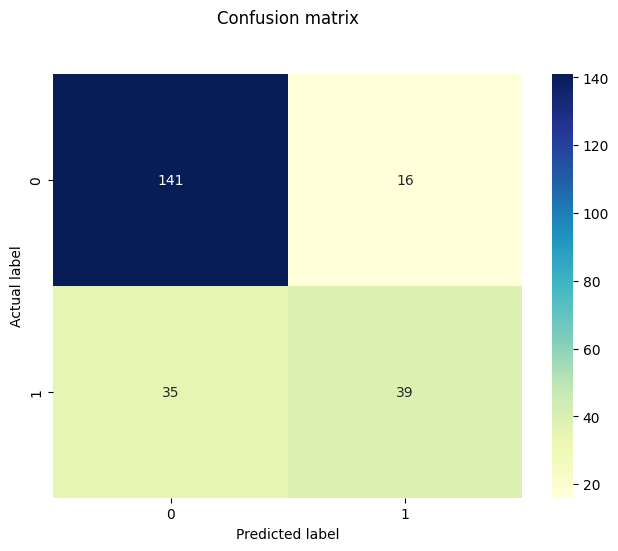

In [13]:
#import required modules
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

class_names=[0,1] #name of classes
fig,ax=plt.subplots()
tick_marks=np.arange(len(class_names))
plt.xticks(tick_marks,class_names)
plt.yticks(tick_marks,class_names)
#crete heatmap
sns.heatmap(pd.DataFrame(cnf_matrix),annot=True,cmap="YlGnBu",fmt='g')
ax.xaxis.set_label_position("bottom")
plt.tight_layout()
plt.title('Confusion matrix',y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [15]:
from sklearn.metrics import classification_report
target_names=['without diabetes','with diabetes']
print(classification_report(y.test,y_pred,target_names=target_names))

                  precision    recall  f1-score   support

without diabetes       0.80      0.90      0.85       157
   with diabetes       0.71      0.53      0.60        74

        accuracy                           0.78       231
       macro avg       0.76      0.71      0.73       231
    weighted avg       0.77      0.78      0.77       231



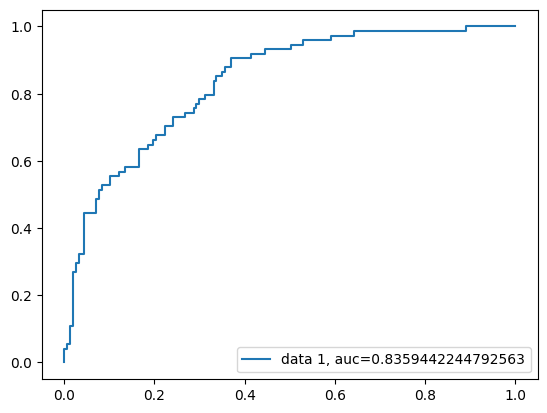

In [28]:
y_pred_proba=logreg.predict_proba(x.test)[::,1]
fpr,tpr,_=metrics.roc_curve(y.test,y_pred_proba)
auc=metrics.roc_auc_score(y.test,y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()